In [1]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import os
import PIL # for reading tif images
import h5py
import datetime as dt
import time

results = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\"
ms = 1e-3

def eval_str_from_h5(h5_str):
    """a stupid way to evaluate python evaluable strings I saved as ARTIQ datasets"""
    return eval(str(np.array(h5_str))[2:-1])

## January 2024

### 2023.12.24

In [2]:
f = h5py.File(os.path.join(results, "2023-12-24\\14\\000008985-SingleAtomTrapLifetime.h5"))
# [x for x in f['datasets']]

In [12]:
[x for x in f['archive']]

['AOM_A1_freq',
 'AOM_A1_power',
 'AOM_A2_freq',
 'AOM_A2_power',
 'AOM_A3_freq',
 'AOM_A3_power',
 'AOM_A4_freq',
 'AOM_A4_power',
 'AOM_A5_freq',
 'AOM_A5_power',
 'AOM_A6_freq',
 'AOM_A6_power',
 'AX_volts_MOT',
 'AX_volts_OP',
 'AX_volts_PGC',
 'AX_volts_RO',
 'AY_volts_MOT',
 'AY_volts_OP',
 'AY_volts_PGC',
 'AY_volts_RO',
 'AZ_bottom_volts_MOT',
 'AZ_bottom_volts_OP',
 'AZ_bottom_volts_PGC',
 'AZ_bottom_volts_RO',
 'AZ_top_volts_MOT',
 'AZ_top_volts_OP',
 'AZ_top_volts_PGC',
 'AZ_top_volts_RO',
 'Luca_trigger_for_feedback_verification',
 'MOT5_fW_Thor_monitor',
 'MOT5_fW_monitor',
 'MOT_beam_monitor_points',
 'Vx_array',
 'Vy_array',
 'Vz_bottom_array',
 'Vz_top_array',
 '[-1.5 - i*(3.3 - 1.5)',
 '[0.025 - k*(0.9 + 0.025)',
 '[0.15 - j*(0.8 + 0.15)',
 '[0.6 - l*(0.6 - 1)',
 'aom_feedback_averages',
 'aom_feedback_iterations',
 'blowaway_light_off',
 'cooling_setpoint_mW',
 'cooling_volts_ch',
 'do_PGC_in_MOT',
 'enable_laser_feedback',
 'fW_Thor_monitor',
 'f_D1_pumping_SP',
 'f_

In [27]:
# parameters loaded from datasets set in experiment variables are in archive. those set in the experiment itself are in datasets

n_measurements = np.uint(f['datasets']['n_measurements'])
counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]
t_delay_arr = eval_str_from_h5(f['datasets']['t_delay_between_shots_sequence'])
t_exp = np.float64(f['archive']['t_SPCM_first_shot'])

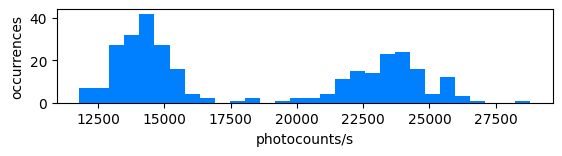

loading rate 0.43666666666666665


In [36]:
# plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
cutoff = 300
retention_array = np.zeros(len(t_delay_arr))
loading_rate_array = np.zeros(len(t_delay_arr))
n_atoms_loaded_array = np.zeros(len(t_delay_arr))

i = 3
shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]

fig,ax = plt.subplots()
# plt.hist((shot1-np.mean(shot1[shot1<270]))/t_exp,bins=30, facecolor=(0.0, 0.5, 1, 1),label='shot 1')
ax.hist((shot1)/t_exp,bins=30, facecolor=(0.0, 0.5, 1, 1),label='shot 1')
# plt.hist(shot1,bins=30, facecolor=(0.0, 0.5, 1, 1),label='shot 1')

# plt.hist(shot2,bins=30, facecolor=(1.0, 0.0, 0.0, 0.1),label='shot 2', edgecolor=(0, 0, 0, 1), linestyle='-')
# plt.title(f"t={t/ms}ms")
ax.set_xlabel("photocounts/s")
ax.set_ylabel("occurrences")
aspect = 80
ax.set_aspect(aspect)
plt.dpi = 200
# plt.savefig("2023-12-24_atom_loading_histogram_counts_per_s_zero_background2.jpg",bbox_inches='tight')
# plt.savefig("2023-12-24_atom_loading_histogram_counts_per_s_2.jpg",bbox_inches='tight')
# plt.savefig("2023-12-24_atom_loading_histogram_counts_per_s_2.jpg",bbox_inches='tight')
plt.savefig(f"2023-12-24_atom_loading_histogram_counts_per_s_aspect{aspect}.jpg",bbox_inches='tight')

plt.show()
atoms_loaded = [x > cutoff for x in shot1]
n_atoms_loaded = sum(atoms_loaded)
atoms_retained = [x > cutoff and y for x,y in zip(shot2, atoms_loaded)]
retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
retention_array[i] = retention_fraction
loading_rate_array[i] = n_atoms_loaded/n_measurements
print("loading rate",loading_rate_array[i])
n_atoms_loaded_array[i] = n_atoms_loaded

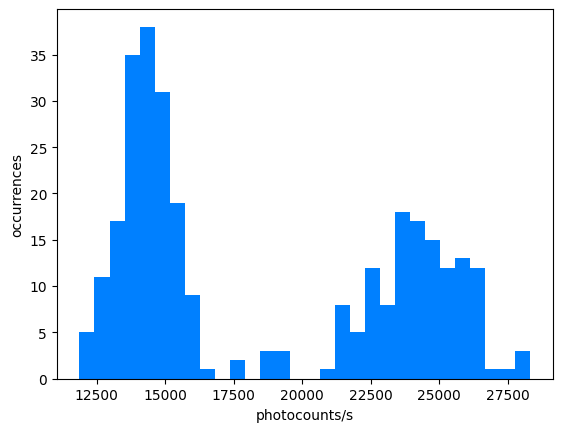

loading rate 0.42


In [16]:
# plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
cutoff = 300
retention_array = np.zeros(len(t_delay_arr))
loading_rate_array = np.zeros(len(t_delay_arr))
n_atoms_loaded_array = np.zeros(len(t_delay_arr))

i = 0
shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]
plt.hist(shot1/t_exp,bins=30, facecolor=(0.0, 0.5, 1, 1),label='shot 1')
# plt.hist(shot2,bins=30, facecolor=(1.0, 0.0, 0.0, 0.1),label='shot 2', edgecolor=(0, 0, 0, 1), linestyle='-')
# plt.title(f"t={t/ms}ms")
plt.xlabel("photocounts/s")
plt.ylabel("occurrences")
plt.dpi = 200
plt.savefig("2023-12-24_atom_loading_histogram_counts_per_s_zero_background.jpg",bbox_inches='tight')
plt.show()
atoms_loaded = [x > cutoff for x in shot1]
n_atoms_loaded = sum(atoms_loaded)
atoms_retained = [x > cutoff and y for x,y in zip(shot2, atoms_loaded)]
retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
retention_array[i] = retention_fraction
loading_rate_array[i] = n_atoms_loaded/n_measurements
print("loading rate",loading_rate_array[i])
n_atoms_loaded_array[i] = n_atoms_loaded

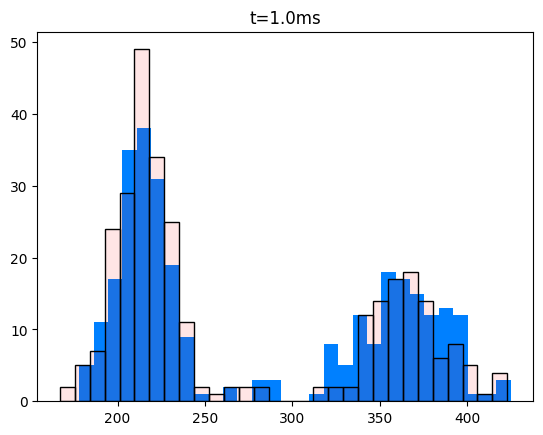

loading rate 0.42


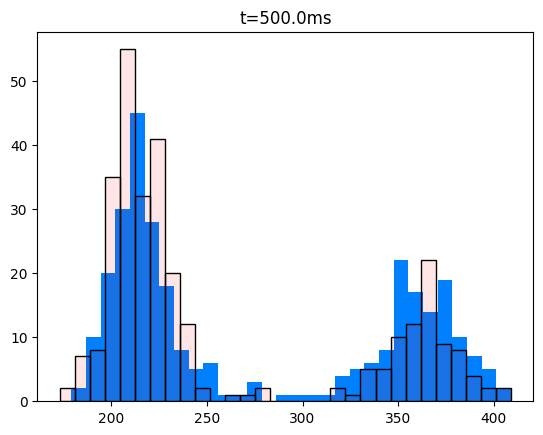

loading rate 0.4033333333333333


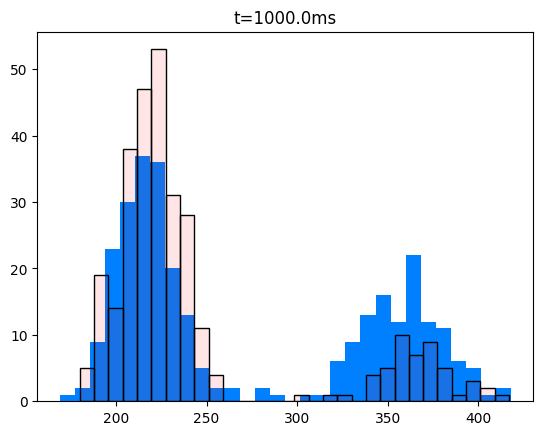

loading rate 0.39


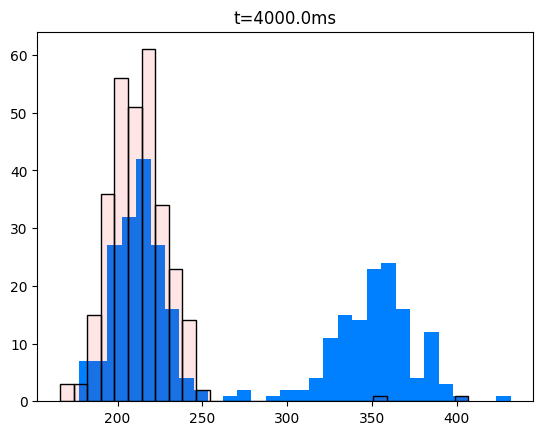

loading rate 0.43666666666666665


In [5]:
# plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
cutoff = 300
retention_array = np.zeros(len(t_delay_arr))
loading_rate_array = np.zeros(len(t_delay_arr))
n_atoms_loaded_array = np.zeros(len(t_delay_arr))

for i,t in enumerate(t_delay_arr):
    shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
    shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]
    plt.hist(shot1,bins=30, facecolor=(0.0, 0.5, 1, 1),label='shot 1')
    plt.hist(shot2,bins=30, facecolor=(1.0, 0.0, 0.0, 0.1),label='shot 2', edgecolor=(0, 0, 0, 1), linestyle='-')
    plt.title(f"t={t/ms}ms")
    plt.show()
    atoms_loaded = [x > cutoff for x in shot1]
    n_atoms_loaded = sum(atoms_loaded)
    atoms_retained = [x > cutoff and y for x,y in zip(shot2, atoms_loaded)]
    retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
    retention_array[i] = retention_fraction
    loading_rate_array[i] = n_atoms_loaded/n_measurements
    print("loading rate",loading_rate_array[i])
    n_atoms_loaded_array[i] = n_atoms_loaded

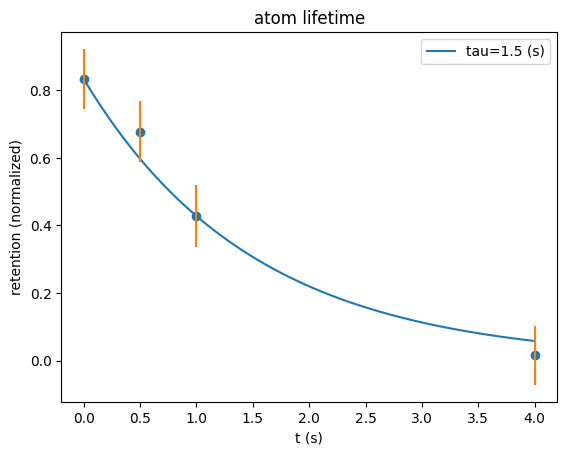

In [13]:
plt.scatter(t_delay_arr, retention_array)
t_pts = np.linspace(t_delay_arr[0],t_delay_arr[-1],100)
tau = 1.5
plt.title('atom lifetime')
plt.plot(t_pts,retention_array[0]*np.exp(-t_pts/tau),label=f"tau={tau} (s)")
plt.errorbar(t_delay_arr,retention_array,1/np.sqrt(n_atoms_loaded_array),ls='none')
plt.ylabel("retention (normalized)")
plt.xlabel("t (s)")
# plt.xlim((0,1.1))
plt.legend()

## November 2023

### 2023.11.21

#### diagnose baseline retention
The retention with a very short holding time should be > 90% unless the atoms are really hot, being significantly heated by the readout, or being heated out by RIN from the FORT light.

In [235]:
f = h5py.File(os.path.join(results, "2023-11-21\\10\\000007904-SingleAtomTrapLifetime.h5"))

In [236]:
n_measurements = np.uint(f['datasets']['n_measurements'])
counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]
t_delay_arr = eval_str_from_h5(f['datasets']['t_delay_between_shots'])
print("MOT AOMs on the whole time?", np.bool_(f['datasets']['MOT_AOMs_always_on']))
print("PGC phase?", np.bool_(f['datasets']['do_PGC_in_MOT']))

MOT AOMs on the whole time? False
PGC phase? False


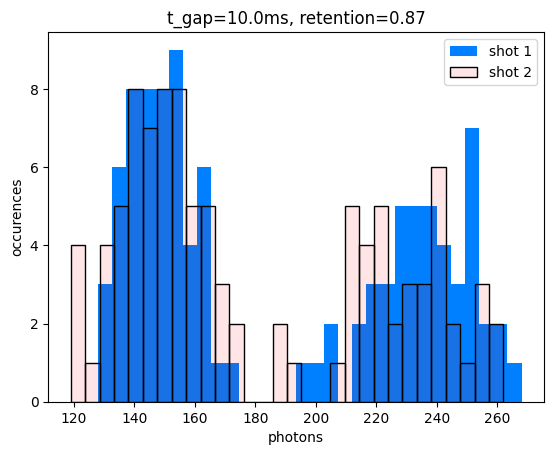

In [262]:
# plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
cutoff = [180]*4
retention_array = np.zeros(len(t_delay_arr))
loading_rate_array = np.zeros(len(t_delay_arr))
n_atoms_loaded_array = np.zeros(len(t_delay_arr))

for i,t in enumerate(t_delay_arr):
    shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
    shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]
    plt.hist(shot1,bins=30, facecolor=(0.0, 0.5, 1, 1),label='shot 1')
    plt.hist(shot2,bins=30, facecolor=(1.0, 0.0, 0.0, 0.1),label='shot 2', edgecolor=(0, 0, 0, 1), linestyle='-')
    
    atoms_loaded = [x > cutoff[i] for x in shot1]
    n_atoms_loaded = sum(atoms_loaded)
    atoms_retained = [x > cutoff[i] and y for x,y in zip(shot2, atoms_loaded)]
    retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
    retention_array[i] = retention_fraction
    loading_rate_array[i] = n_atoms_loaded/n_measurements
    n_atoms_loaded_array[i] = n_atoms_loaded

    plt.title(f"t_gap={t/ms}ms, retention={retention_fraction:.2f}")
    plt.ylabel("occurences")
    plt.xlabel("photons")
    plt.legend()
    plt.show()

In [243]:
plt.hist?

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

### 2023.11.20

#### with PGC phase after MOT

In [264]:
f = h5py.File(os.path.join(results, "2023-11-20\\17\\000007897-SingleAtomTrapLifetime.h5"))
# [x for x in f['datasets']]

In [265]:
n_measurements = np.uint(f['datasets']['n_measurements'])
counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]
t_delay_arr = eval_str_from_h5(f['datasets']['t_delay_between_shots'])
print("MOT AOMs on the whole time?", np.bool_(f['datasets']['MOT_AOMs_always_on']))
print("PGC phase?", np.bool_(f['datasets']['do_PGC_in_MOT']))

MOT AOMs on the whole time? False
PGC phase? True


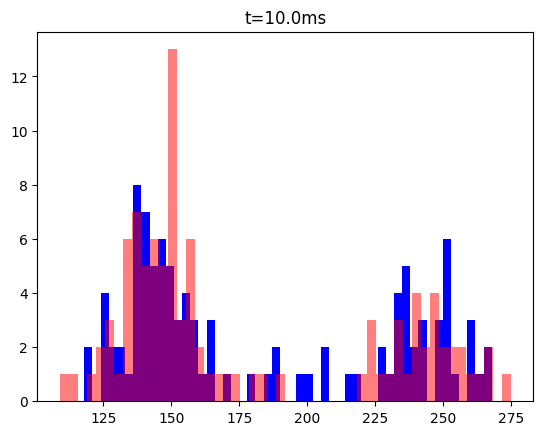

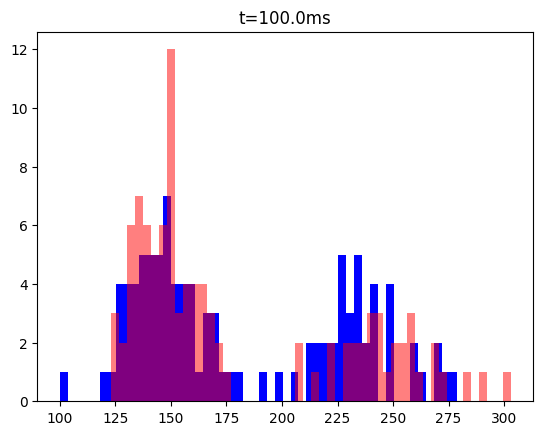

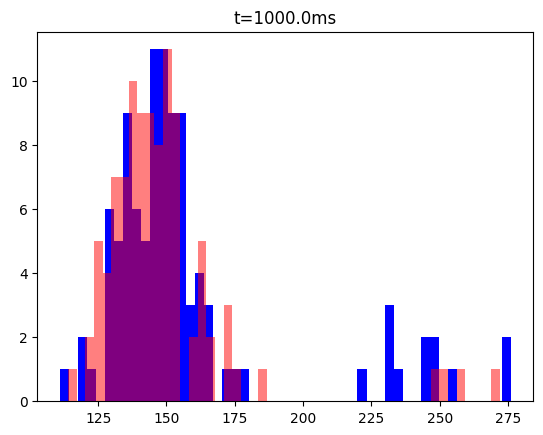

In [266]:
# plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
cutoff = [180]*4
retention_array = np.zeros(len(t_delay_arr))
loading_rate_array = np.zeros(len(t_delay_arr))
n_atoms_loaded_array = np.zeros(len(t_delay_arr))

for i,t in enumerate(t_delay_arr):
    shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
    shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]
    plt.hist(shot1,bins=50, facecolor=(0.0, 0.0, 1.0, 1))
    plt.hist(shot2,bins=50, facecolor=(1.0, 0.0, 0.0, 0.5)) #edgecolor=(1, 0.5, 0.2, 1),
    plt.title(f"t={t/ms}ms")
    plt.show()
    atoms_loaded = [x > cutoff[i] for x in shot1]
    n_atoms_loaded = sum(atoms_loaded)
    atoms_retained = [x > cutoff[i] and y for x,y in zip(shot2, atoms_loaded)]
    retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
    retention_array[i] = retention_fraction
    loading_rate_array[i] = n_atoms_loaded/n_measurements
    n_atoms_loaded_array[i] = n_atoms_loaded

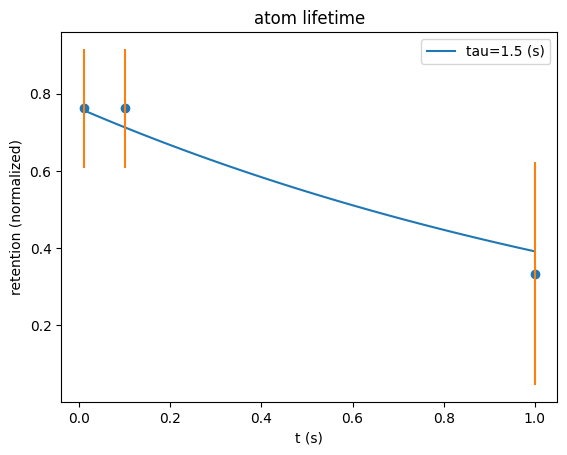

In [269]:
plt.scatter(t_delay_arr, retention_array)
t_pts = np.linspace(t_delay_arr[0],t_delay_arr[-1],100)
tau = 1.5
plt.title('atom lifetime')
plt.plot(t_pts,retention_array[0]*np.exp(-t_pts/tau),label=f"tau={tau} (s)")
plt.errorbar(t_delay_arr,retention_array,1/np.sqrt(n_atoms_loaded_array),ls='none')
plt.ylabel("retention (normalized)")
plt.xlabel("t (s)")
# plt.xlim((0,1.1))
plt.legend()

#### with MOT AOMs on the whole time
if the readout is heating the atom, the lifetime should go down

In [271]:
f = h5py.File(os.path.join(results, "2023-11-20\\16\\000007889-SingleAtomTrapLifetime.h5"))
# [x for x in f['datasets']]

In [272]:
n_measurements = np.uint(f['datasets']['n_measurements'])
counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]
t_delay_arr = eval_str_from_h5(f['datasets']['t_delay_between_shots'])
print("MOT AOMs on the whole time?", np.bool_(f['datasets']['MOT_AOMs_always_on']))
print("PGC phase?", np.bool_(f['datasets']['do_PGC_in_MOT']))

MOT AOMs on the whole time? True
PGC phase? False


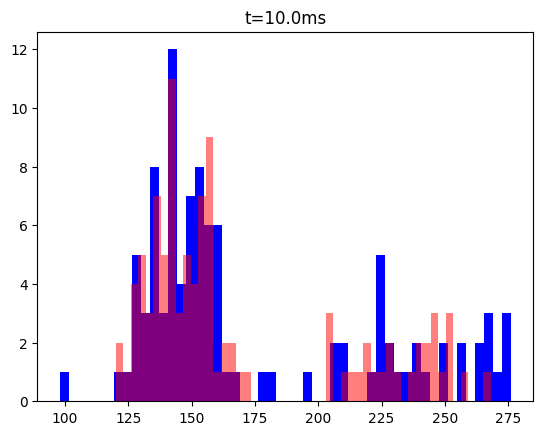

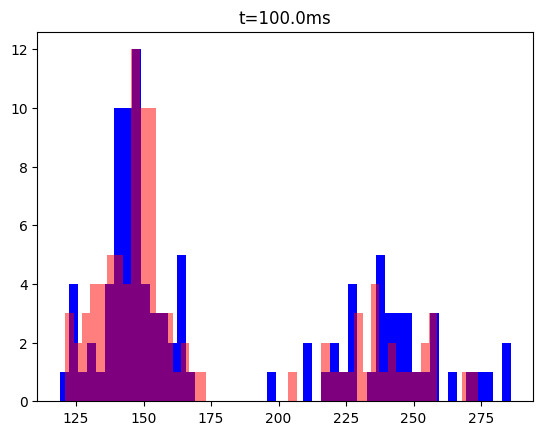

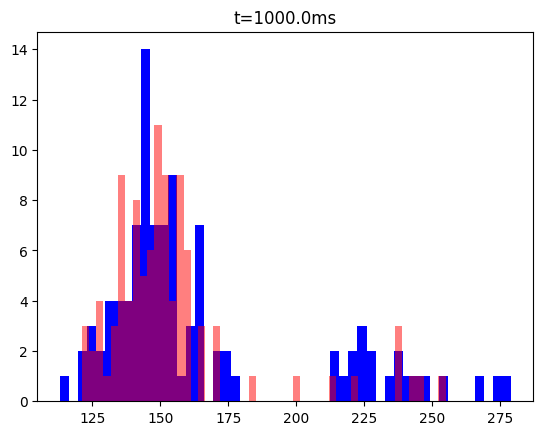

In [273]:
# plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
cutoff = [180]*4
retention_array = np.zeros(len(t_delay_arr))
loading_rate_array = np.zeros(len(t_delay_arr))
n_atoms_loaded_array = np.zeros(len(t_delay_arr))

for i,t in enumerate(t_delay_arr):
    shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
    shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]
    plt.hist(shot1,bins=50, facecolor=(0.0, 0.0, 1.0, 1))
    plt.hist(shot2,bins=50, facecolor=(1.0, 0.0, 0.0, 0.5)) #edgecolor=(1, 0.5, 0.2, 1),
    plt.title(f"t={t/ms}ms")
    plt.show()
    atoms_loaded = [x > cutoff[i] for x in shot1]
    n_atoms_loaded = sum(atoms_loaded)
    atoms_retained = [x > cutoff[i] and y for x,y in zip(shot2, atoms_loaded)]
    retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
    retention_array[i] = retention_fraction
    loading_rate_array[i] = n_atoms_loaded/n_measurements
    n_atoms_loaded_array[i] = n_atoms_loaded

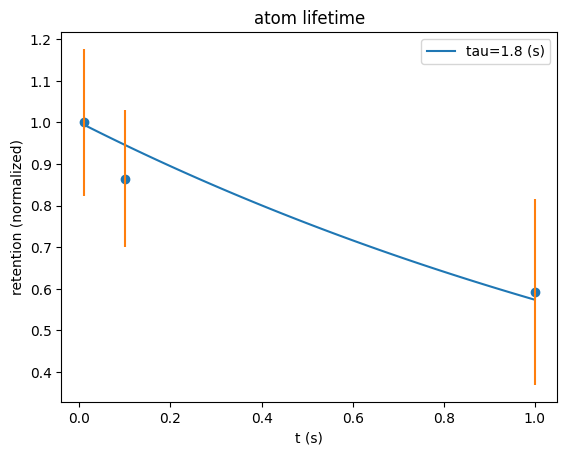

In [275]:
plt.scatter(t_delay_arr, retention_array/retention_array[0])
t_pts = np.linspace(t_delay_arr[0],t_delay_arr[-1],100)
tau = 1.8
plt.title('atom lifetime')
plt.plot(t_pts,np.exp(-t_pts/tau),label=f"tau={tau} (s)")
plt.errorbar(t_delay_arr,retention_array/retention_array[0],1/np.sqrt(n_atoms_loaded_array),ls='none')
plt.ylabel("retention (normalized)")
plt.xlabel("t (s)")
# plt.xlim((0,1.1))
plt.legend()

#### check if the atom lifetime is suffering due to the heating from the readout
by comparing two lifetime experiments with only a 0.5 s holding time, but one has no first readout.

In [175]:
datestr = "2023-11-20"
files = [h5py.File(os.path.join(results, datestr, file)) for file in ["16\\000007885-SingleAtomTrapLifetime.h5","16\\000007886-SingleAtomTrapLifetime.h5"]]
# [x for x in f['datasets']]

True


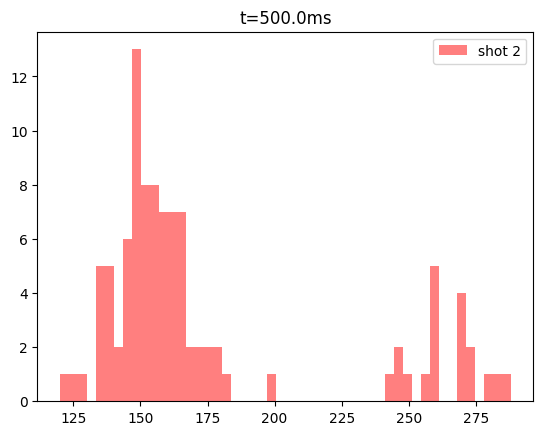

False


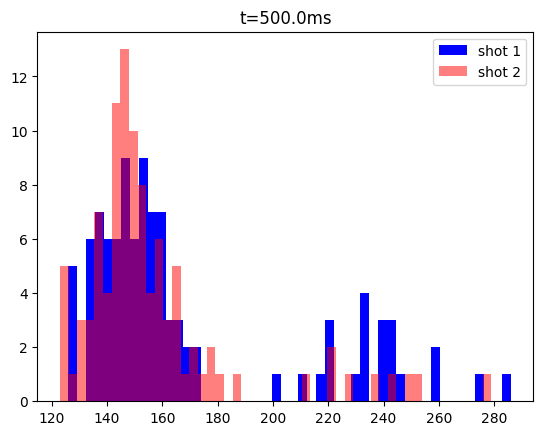

In [179]:
for f in files:

    n_measurements = np.uint(f['datasets']['n_measurements'])
    counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
    counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]
    t_delay_arr = eval_str_from_h5(f['datasets']['t_delay_between_shots'])
    no_first_shot = np.bool_(f['datasets']['no_first_shot'])
    print(no_first_shot)
    
    # plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
    cutoff = [200]
    retention_array = np.zeros(len(t_delay_arr))
    loading_rate_array = np.zeros(len(t_delay_arr))
    
    for i,t in enumerate(t_delay_arr):
        shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
        shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]
        if not no_first_shot:
            plt.hist(shot1,bins=50, facecolor=(0.0, 0.0, 1.0, 1),label='shot 1')
        plt.hist(shot2,bins=50, facecolor=(1.0, 0.0, 0.0, 0.5),label='shot 2') #edgecolor=(1, 0.5, 0.2, 1),
        plt.title(f"t={t/ms}ms")
        plt.legend()
        plt.show()
        atoms_loaded = [x > cutoff[i] for x in shot1]
        n_atoms_loaded = sum(atoms_loaded)
        atoms_retained = [x > cutoff[i] and y for x,y in zip(shot2, atoms_loaded)]
        retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
        retention_array[i] = retention_fraction
        loading_rate_array[i] = n_atoms_loaded/n_measurements 

#### the first experiment to measure the lifetime of our single atoms in the dipole trap

In [180]:
# the measurement from Friday night
f = h5py.File(os.path.join(results, "2023-11-17\\17\\000007857-SingleAtomTrapLifetime.h5"))
[x for x in f['datasets']]

['AOM_A1_power',
 'AOM_A2_power',
 'AOM_A3_power',
 'AOM_A4_power',
 'AOM_A5_power',
 'AOM_A6_power',
 'FORT_monitor',
 'MOT1_monitor',
 'MOT2_monitor',
 'MOT3_monitor',
 'MOT4_monitor',
 'MOT5_monitor',
 'MOT6_monitor',
 'MOT_switchyard_monitor',
 'atom_counts_threshold',
 'atom_retention',
 'bins',
 'do_PGC_in_MOT',
 'n_measurements',
 'no_first_shot',
 'p_cooling_DP_MOT',
 'photocount_bins',
 'photocounts',
 'photocounts2',
 'scan_datasets',
 't_delay_between_shots']

In [182]:
n_measurements = np.uint(f['datasets']['n_measurements'])
counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]
t_delay_arr = eval_str_from_h5(f['datasets']['t_delay_between_shots'])

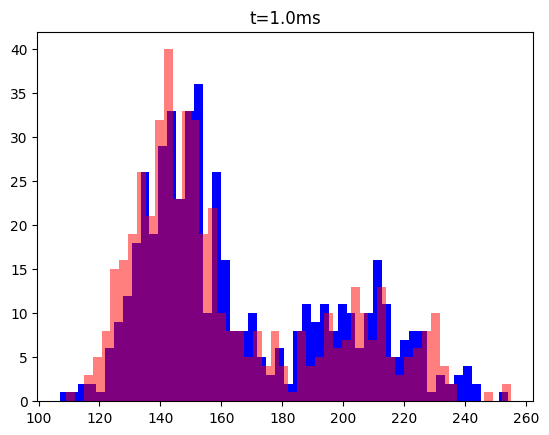

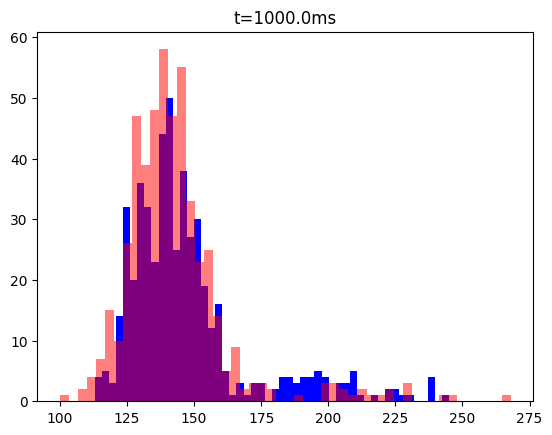

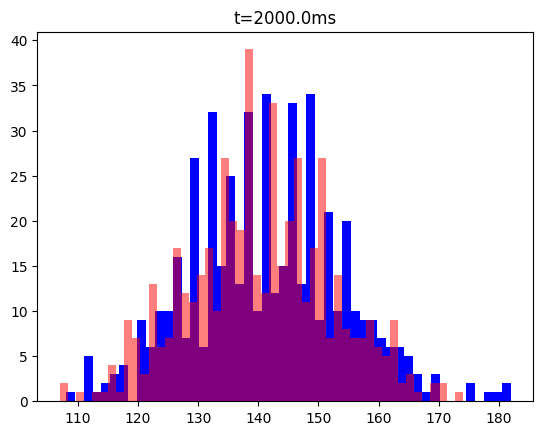

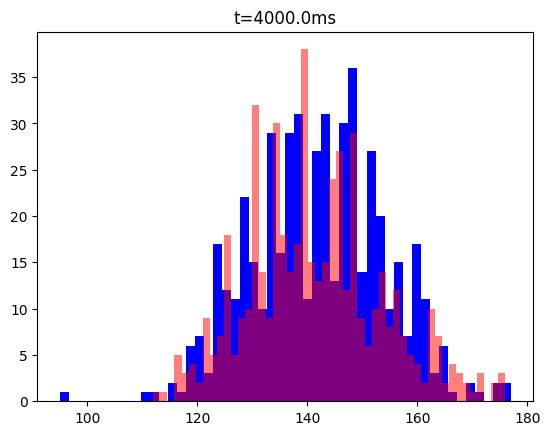

In [183]:
# plot histogram for each iteration (iteration = experiment sequence with a particular gap time between shots)
cutoff = [180,175,175,175]
retention_array = np.zeros(len(t_delay_arr))
loading_rate_array = np.zeros(len(t_delay_arr))
n_atoms_loaded_array = np.zeros(len(t_delay_arr))

for i,t in enumerate(t_delay_arr):
    shot1 = counts_shot1[i*n_measurements:(i+1)*n_measurements]
    shot2 = counts_shot2[i*n_measurements:(i+1)*n_measurements]
    plt.hist(shot1,bins=50, facecolor=(0.0, 0.0, 1.0, 1))
    plt.hist(shot2,bins=50, facecolor=(1.0, 0.0, 0.0, 0.5)) #edgecolor=(1, 0.5, 0.2, 1),
    plt.title(f"t={t/ms}ms")
    plt.show()
    atoms_loaded = [x > cutoff[i] for x in shot1]
    n_atoms_loaded = sum(atoms_loaded)
    atoms_retained = [x > cutoff[i] and y for x,y in zip(shot2, atoms_loaded)]
    retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
    retention_array[i] = retention_fraction
    loading_rate_array[i] = n_atoms_loaded/n_measurements
    n_atoms_loaded_array[i] = n_atoms_loaded

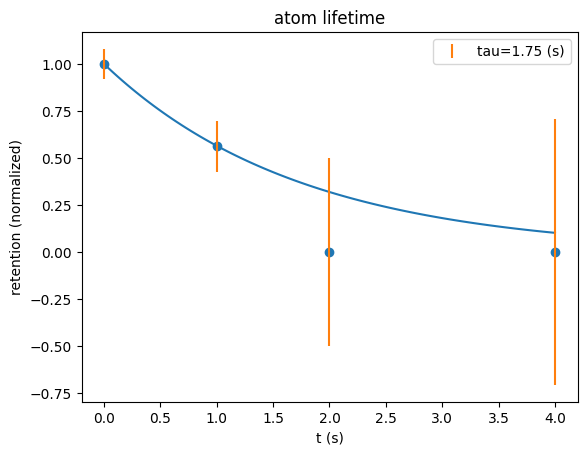

In [193]:
plt.scatter(t_delay_arr, retention_array/retention_array[0])
t_pts = np.linspace(t_delay_arr[0],t_delay_arr[-1],100)
tau = 1.75
plt.title('atom lifetime')
plt.plot(t_pts,np.exp(-t_pts/tau))#,label=f"tau={tau} (s)")
plt.errorbar(t_delay_arr,retention_array/retention_array[0],1/np.sqrt(n_atoms_loaded_array),ls='none',label=f"tau={tau} (s)")
plt.ylabel("retention (normalized)")
plt.xlabel("t (s)")
# plt.xlim((0,1.1))
plt.legend()

Text(0.5, 0, 'minutes')

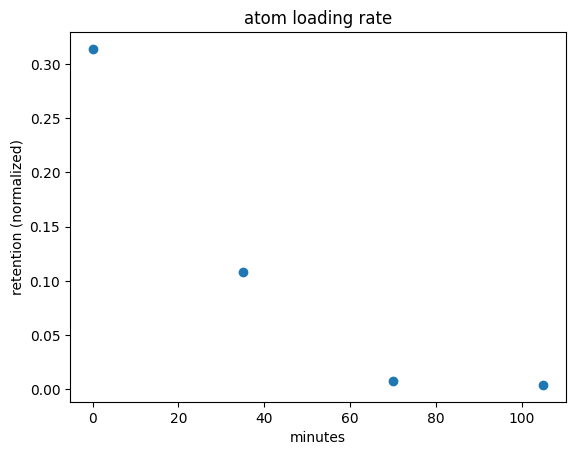

In [103]:
time = np.linspace(0,60+45,4)
plt.scatter(time,loading_rate_array)
plt.title('atom loading rate')
# plt.plot(t_pts,np.exp(-t_pts/tau),label=f"tau={tau} (s)")
plt.ylabel("retention (normalized)")
plt.xlabel("minutes")